In [17]:
import pandas as pd
# Reading data from a CSV file
#Remember to modify the fowlloing directory
data = pd.read_csv('/content/drive/MyDrive/assignment2/phishing_selected_features_1030 (1).csv')
# Displaying
data.head()

,length_url,length_hostname,ip,nb_dots,nb_qm,nb_eq,nb_slash,nb_www,ratio_digits_url,ratio_digits_host,...,longest_words_raw,longest_word_path,phish_hints,nb_hyperlinks,ratio_intHyperlinks,empty_title,domain_in_title,domain_age,google_index,status
0,37,19,0,3,0,0,3,1,0.000000,0.0,...,11,6,0,17,0.529412,0,0,-1,1,legitimate
1,77,23,1,1,0,0,5,0,0.220779,0.0,...,32,32,0,30,0.966667,0,1,5767,1,phishing
2,126,50,1,4,1,3,5,0,0.150794,0.0,...,17,17,0,4,1.000000,0,1,4004,1,phishing
3,18,11,0,2,0,0,2,0,0.000000,0.0,...,5,0,0,149,0.973154,0,1,-1,0,legitimate
4,55,15,0,2,0,0,5,1,0.000000,0.0,...,11,11,0,102,0.470588,0,0,8175,0,legitimate


In [18]:
#Preprocessing
# ===================
import numpy as np
# Generating descriptive statistics of the dataframe
data.describe()

,length_url,length_hostname,ip,nb_dots,nb_qm,nb_eq,nb_slash,nb_www,ratio_digits_url,ratio_digits_host,...,shortest_word_host,longest_words_raw,longest_word_path,phish_hints,nb_hyperlinks,ratio_intHyperlinks,empty_title,domain_in_title,domain_age,google_index
count,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,...,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000
mean,61.126684,21.090289,0.150569,2.480752,0.141207,0.293176,4.289589,0.448469,0.053137,0.025024,...,5.019773,15.393876,10.561505,0.327734,87.189764,0.602457,0.124759,0.775853,4062.543745,0.533946
std,55.297318,10.777171,0.357644,1.369686,0.364456,0.998317,1.882251,0.501912,0.089363,0.093422,...,3.941580,22.083644,23.077883,0.842600,166.758254,0.376474,0.330460,0.417038,3107.784600,0.498868
min,12.000000,4.000000,0.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,...,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-12.000000,0.000000
25%,33.000000,15.000000,0.000000,2.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,...,3.000000,9.000000,0.000000,0.000000,9.000000,0.224991,0.000000,1.000000,972.250000,0.000000
50%,47.000000,19.000000,0.000000,2.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,...,3.000000,11.000000,7.000000,0.000000,34.000000,0.743442,0.000000,1.000000,3993.000000,1.000000
75%,71.000000,24.000000,0.000000,3.000000,0.000000,0.000000,5.000000,1.000000,0.079365,0.000000,...,6.000000,16.000000,11.000000,0.000000,101.000000,0.944767,0.000000,1.000000,7026.750000,1.000000
max,1641.000000,214.000000,1.000000,24.000000,3.000000,19.000000,33.000000,2.000000,0.723881,0.800000,...,39.000000,829.000000,829.000000,10.000000,4659.000000,1.000000,1.000000,1.000000,12874.000000,1.000000


In [19]:
import matplotlib.pyplot as plt
# Confirm the number of missing values in each column.

data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11430 entries, 0 to 11429
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   length_url           11430 non-null  int64  
 1   length_hostname      11430 non-null  int64  
 2   ip                   11430 non-null  int64  
 3   nb_dots              11430 non-null  int64  
 4   nb_qm                11430 non-null  int64  
 5   nb_eq                11430 non-null  int64  
 6   nb_slash             11430 non-null  int64  
 7   nb_www               11430 non-null  int64  
 8   ratio_digits_url     11430 non-null  float64
 9   ratio_digits_host    11430 non-null  float64
 10  tld_in_subdomain     11430 non-null  int64  
 11  prefix_suffix        11430 non-null  int64  
 12  shortest_word_host   11430 non-null  int64  
 13  longest_words_raw    11430 non-null  int64  
 14  longest_word_path    11430 non-null  int64  
 15  phish_hints          11430 non-null 

In [20]:
# Deleting rows with any missing values
data = data.dropna()

<Axes: xlabel='status', ylabel='count'>

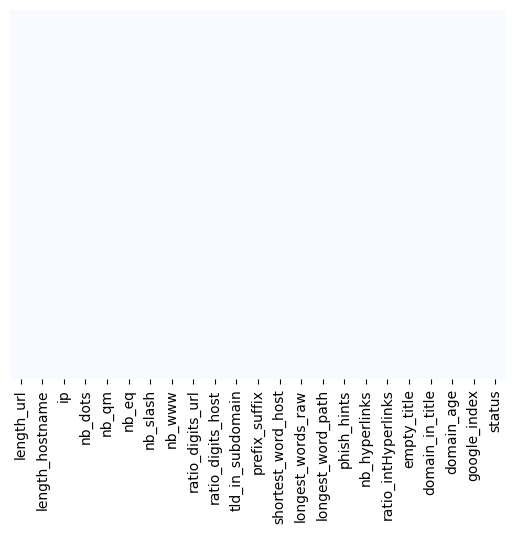

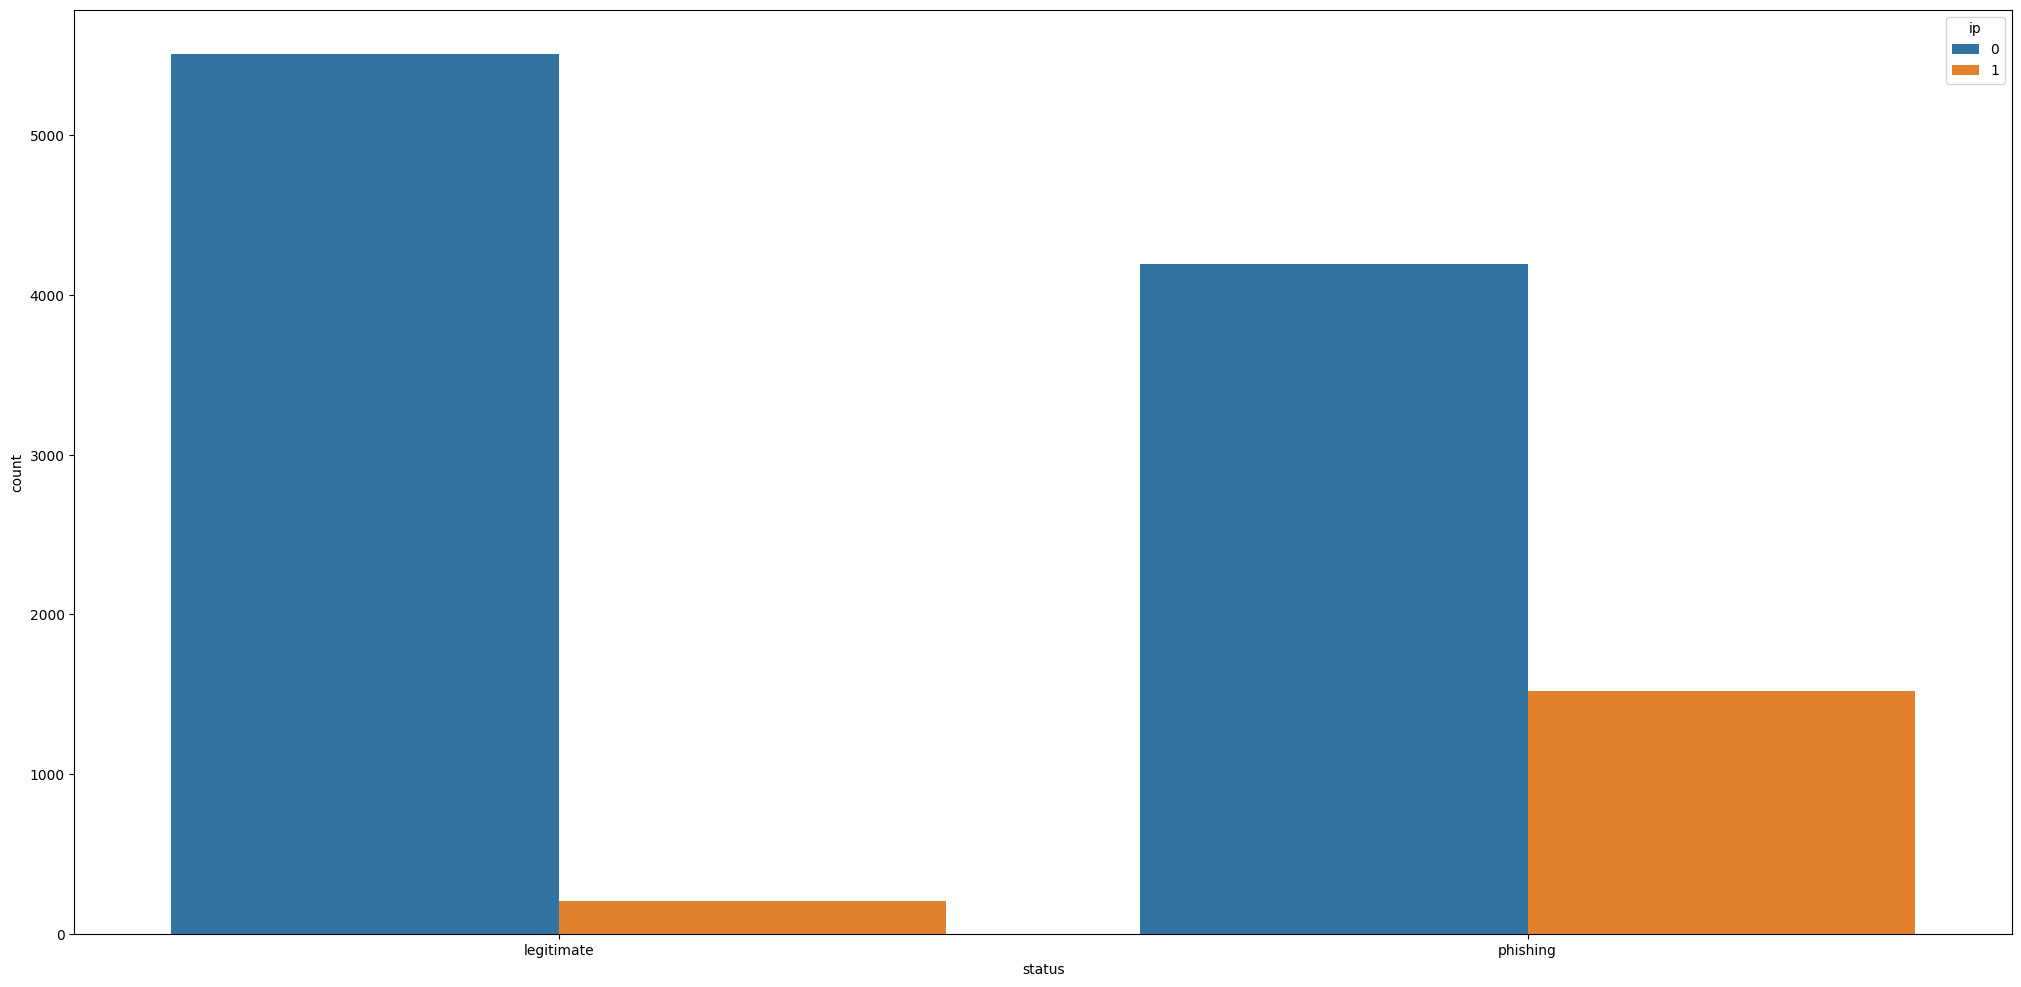

In [23]:
# Displaying a heatmap to show missing values in the dataset
import seaborn as sns
import matplotlib.pyplot as plt




sns.heatmap(data.isnull(), yticklabels = False, cbar = False, cmap="Blues")


plt.figure(figsize=[25, 12])
sns.countplot(x="status", hue="ip", data=data)

# New Section

In [40]:
# Feature Engineering
# ===================
# Extracting relevant columns and converting "type" column to one-hot
#encoded format
data_extract = data[["status", "ip"]]
type_dummies = pd.get_dummies(data_extract["status"], drop_first=True)
data_extract.drop(["status"], axis=1, inplace=True)
data_extract.head()

<ipython-input-40-da9f4a2f58ca>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_extract.drop(["status"], axis=1, inplace=True)


,ip
0,0
1,1
2,1
3,0
4,0


In [42]:
# Scaling the specified columns for model training
from sklearn.preprocessing import StandardScaler
col_names = ['length_url', 'length_hostname',  'nb_dots', 'nb_qm', 'nb_eq',
       'nb_slash', 'nb_www', 'ratio_digits_url', 'ratio_digits_host',
       'tld_in_subdomain', 'prefix_suffix', 'shortest_word_host',
       'longest_words_raw', 'longest_word_path', 'phish_hints',
       'nb_hyperlinks', 'ratio_intHyperlinks', 'empty_title',
       'domain_in_title', 'domain_age', 'google_index']
features = data[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
scaled_features = pd.DataFrame(features, columns=col_names)
new_data = pd.concat([data_extract, type_dummies, scaled_features], axis=1,
ignore_index=False)
new_data.head()

,ip,phishing,length_url,length_hostname,nb_dots,nb_qm,nb_eq,nb_slash,nb_www,ratio_digits_url,...,shortest_word_host,longest_words_raw,longest_word_path,phish_hints,nb_hyperlinks,ratio_intHyperlinks,empty_title,domain_in_title,domain_age,google_index
0,0,0,-0.436327,-0.193964,0.379116,-0.387464,-0.293683,-0.685161,1.098907,-0.594651,...,-0.512450,-0.198974,-0.197666,-0.388973,-0.420926,-0.194034,-0.377549,-1.860473,-1.307594,0.934264
1,1,1,0.287067,0.177207,-1.081136,-0.387464,-0.293683,0.377443,-0.893559,1.876053,...,3.547014,0.751998,0.929003,-0.388973,-0.342965,0.967464,-0.377549,0.537498,0.548471,0.934264
2,1,1,1.173224,2.682613,1.109242,2.356473,2.711505,0.377443,-0.893559,1.092856,...,-0.512450,0.072732,0.279002,-0.388973,-0.498886,1.056008,-0.377549,0.537498,-0.018839,0.934264
3,0,0,-0.779940,-0.936306,-0.351010,-0.387464,-0.293683,-1.216463,-0.893559,-0.594651,...,-0.005017,-0.470680,-0.457666,-0.388973,0.370674,0.984697,-0.377549,0.537498,-1.307594,-1.070361
4,0,0,-0.110800,-0.565135,-0.351010,-0.387464,-0.293683,0.377443,1.098907,-0.594651,...,-0.512450,-0.198974,0.019001,-0.388973,0.088816,-0.350289,-0.377549,-1.860473,1.323334,-1.070361


In [43]:
# Model Selection
# ===================
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()

In [ ]:
# Training
# ===================
# Defining features (X) and target variable (y)
X = new_data.iloc[:, new_data.columns != "phishing"]
y = new_data.iloc[:, new_data.columns == "phishing"]
X.head()

In [76]:
# Splitting the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,
random_state=0)

#X_val, X_test, y_val, y_test = train_test_split(X_train, y_train, test_size=0.5, random_state=0)
#print("Training set:")
#print("X=",X_train.size, "Y=",y_train.size)
#print("Test sets:")
#print("X=", X_test.size, "Y=", y_test.size)
#print("Validating sets:")
#print("X=", X_val.size, "Y=", y_val.size)

In [77]:
# Training the classifier on the training data
decision_tree.fit(X_train, y_train.values.ravel())

DecisionTreeClassifier()

In [78]:
# Evaluation
# ===================
# Making predictions on the test data
y_pred = decision_tree.predict(X_test)

In [79]:
# Evaluating the model"s performance
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
# you can calculate other evalution metrics like fpr and tpr here.

              precision    recall  f1-score   support

           0       0.91      0.92      0.91      1690
           1       0.92      0.91      0.92      1739

    accuracy                           0.92      3429
   macro avg       0.92      0.92      0.92      3429
weighted avg       0.92      0.92      0.92      3429



In [82]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix


print("Confusion Matrix:\n",confusion_matrix(y_test, y_pred))
# Extract values from the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

tn, fp, fn, tp = conf_matrix.ravel()

# Calculate False Positive Rate (FPR)
fpr = fp / (fp + tn)

# Calculate False Negative Rate (FNR)
fnr = fn / (fn + tp)

print(f"False Positive Rate (FPR): {fpr:.4f}")
print(f"False Negative Rate (FNR): {fnr:.4f}")

Confusion Matrix:
 [[1555  135]
 [ 154 1585]]
False Positive Rate (FPR): 0.0799
False Negative Rate (FNR): 0.0886
